This notebook provides an environment to test the different models generated by different train datasets. 

1. Evalueer 'test accuracy'
2. Geschreven functie van een 'Confusion Matrix'
3. Genarate confusion matrix 


In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import expand_dims

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img



# Kies een model welke je wilt evalueren

In [2]:
# model1 = load_model('/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/cleanedAndAugumented_100px.h5')
# img_height = 100
# img_width = 100

model2 = load_model('/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/models/cleanedAndAugumented_180px.h5')
img_height = 180
img_width = 180

# model3 = load_model('/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/models/cleanedAndAugumented_256px.h5')
# img_height = 256 
# img_width = 256

# model4 = load_model('/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/models/augumented_dataset_180px.h5')
# img_height = 180
# img_width = 180


batch_size = 32

2022-11-08 14:27:14.225545: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Evalueer 'test accuracy'

In [ ]:
data_dir = '/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/data/Test'

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


In [ ]:
scores = model2.evaluate(test_ds)

In [ ]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model1.evaluate(x_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

# # Generate predictions (probabilities -- the output of the last layer)
# # on new data using `predict`
# print("Generate predictions for 3 samples")
# predictions = model1.predict(x_test[:3])
# print("predictions shape:", predictions.shape)

# 2. Geschreven functie van een 'Confusion Matrix'

In [5]:
def confusionMatrix(model, img_height, img_width, test_data_dir = '/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/classifier/data/Test'):
  
  test_ds = tf.keras.utils.image_dataset_from_directory(
      test_data_dir,
      seed=123,
      image_size=(img_height, img_width),
      batch_size = batch_size)
  test_label = test_ds.class_names
  print(test_label)
  
  batchPredictions = model.predict(test_ds)
  predicted_categories = tf.argmax(batchPredictions, axis=1)
  true_categories = tf.concat([y for x, y in test_ds], axis=0)
  result_confusion_matrix = confusion_matrix(true_categories, predicted_categories)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

  cm_display.plot()
  plt.show()

# 3. Genereer een 'Confusion Matrix'

In [ ]:
# confusionMatrix(model1, 100, 100)

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


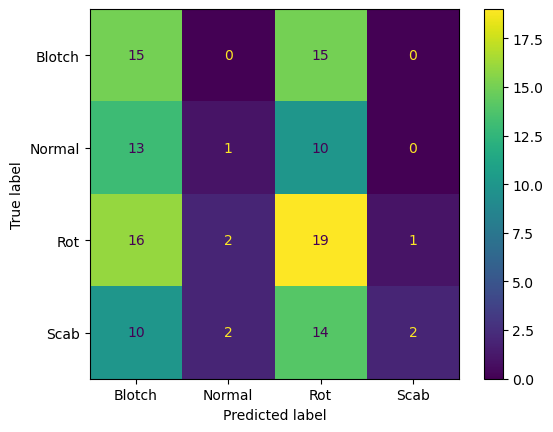

In [6]:
confusionMatrix(model2, 180, 180)

In [ ]:
# confusionMatrix(model3, 256, 256)

In [ ]:
# confusionMatrix(model4, 180, 180)